In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt

In [2]:
wdir = r'C:\Users\noaht\Documents\Data_Mining\Project 2'
os.chdir(wdir)
# get csv files 
csvFiles = glob.glob(os.path.join(wdir + '\data', '*.csv'))


In [3]:
# turn csv into dataFrame 
df = pd.DataFrame()
for file in csvFiles:
    df = df.append(pd.read_csv(file))

df.head(25)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [46]:
df.shape

(129880, 25)

In [4]:
#the data set if fairly large
print(df.shape)
print(df.dtypes)
print(df.isna().sum())

(129880, 25)
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int

In [5]:
#Drop null valued data frames beacause theres so little of them 
satData = df.dropna(0,'any')
print(satData.isna().sum())
print(satData.shape)

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
(129487, 25)

C:\Users\noaht\AppData\Local\Temp/ipykernel_14036/1543603544.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  satData = df.dropna(0,'any')


In [6]:
def getRidOfZeros(labels,df ):
    
    for label in labels: 
        df = df[(df[label]!= 0)]
    return df



In [7]:
print(satData.shape)
desired_columns = satData.columns
desired_col = list(desired_columns[8:-3])
satData = getRidOfZeros(desired_col,satData) 

print(satData.shape)


(129487, 25)
(119204, 25)


In [8]:
# replace class string with int (0 or 1)
replace = {'satisfaction': {'satisfied' : 1, 'neutral or dissatisfied': 0}}
satData = satData.replace(replace)
#note 1 = satisfied, 0 = neutral or dissatisfied 
print(satData.shape)


(119204, 25)


In [9]:
satData.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,1
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,1


In [10]:
#creates percent dataframe
def pctDf(feature, target, orgDf):
    cool = satData[[feature,target]].copy()
    new_df = cool.groupby(feature)[target].value_counts(normalize=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()
    replace = {'satisfaction': {  1: 'satisfied',  0: 'neutral or dissatisfied'}}
    new_df = new_df.replace(replace)
    return new_df

In [11]:
def scatterDf(df, ylab):
    replace = {'satisfaction': {  1: 'satisfied',  0: 'neutral or dissatisfied'}}
    df = df.replace(replace)
    g = sns.violinplot(data=df, x="satisfaction", y= ylab, hue = 'satisfaction',ci = 'None', aspect = 1.5).set(title = ylab)
    return g
    

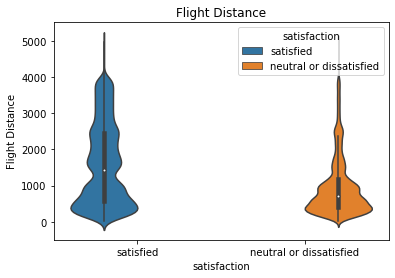

(119204, 25)


In [12]:
plt.show(scatterDf(satData, 'Flight Distance'))
print(satData.shape)

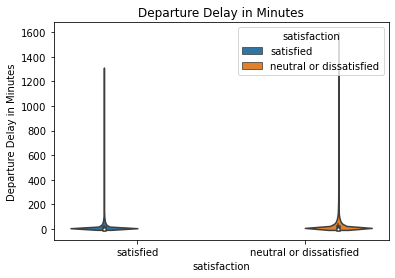

(119204, 25)


In [13]:
plt.show(scatterDf(satData, 'Departure Delay in Minutes'))
print(satData.shape)


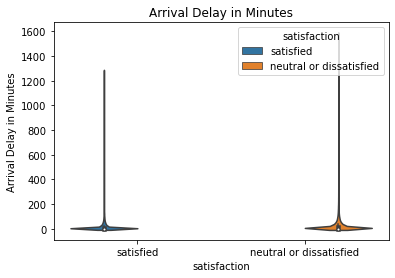

(119204, 25)


In [14]:
plt.show(scatterDf(satData, 'Arrival Delay in Minutes'))
print(satData.shape)


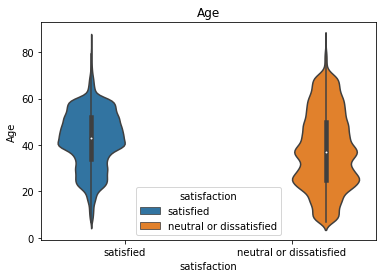

(119204, 25)


In [15]:
plt.show(scatterDf(satData, 'Age'))
print(satData.shape)


In [16]:
def doaBGraph(df, xlab):
    os.chdir(r'C:\Users\noaht\Documents\Data_Mining\Project 2' +r'\Graphs')
    g = sns.catplot(x=xlab, y='Percent', hue= 'satisfaction',
                data=df, saturation=.5,
                kind="bar", ci=None).set(title = xlab + ' Percentage')
    try: 
        g.savefig(xlab + 'pct' + '.png')
    except:
        print("error could not save file column:  " + xlab)
    return g



In [17]:
satData.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [18]:
ClassPct = pctDf('Class', 'satisfaction', satData)

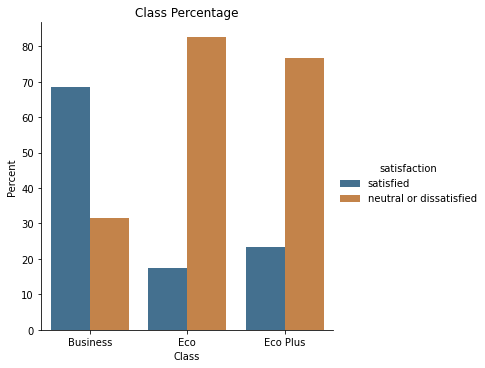

(119204, 25)


In [19]:
cool = doaBGraph(ClassPct, 'Class')
plt.show(cool)
print(satData.shape)
cool.savefig('Classpct.png')

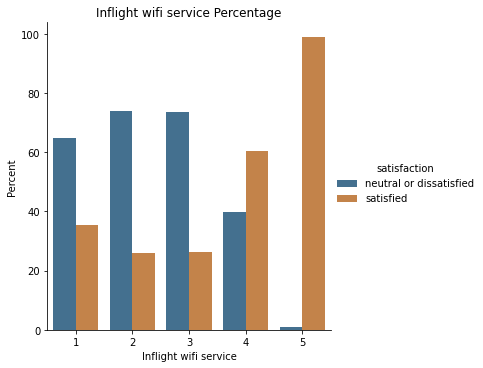

(119204, 25)


In [20]:
InWifipct = pctDf('Inflight wifi service', 'satisfaction', satData)
InwifiPlt = doaBGraph(InWifipct, 'Inflight wifi service')
plt.show(InwifiPlt)
print(satData.shape)


error could not save file column:  Departure/Arrival time convenient


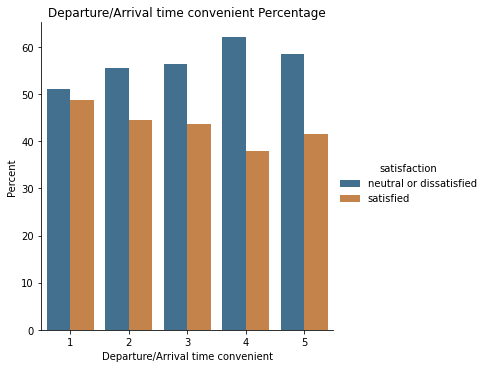

In [21]:
Daparture_Arrivealpct = pctDf('Departure/Arrival time convenient', 'satisfaction', satData)
Daparture_Arrivealpct = doaBGraph(Daparture_Arrivealpct, 'Departure/Arrival time convenient')
plt.show(Daparture_Arrivealpct)

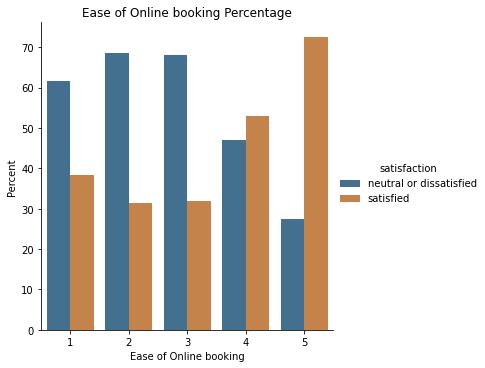

In [22]:
EaseOfOnlinepct = pctDf('Ease of Online booking', 'satisfaction', satData)
EaseOfOnlinepct = doaBGraph(EaseOfOnlinepct, 'Ease of Online booking')
plt.show(EaseOfOnlinepct)

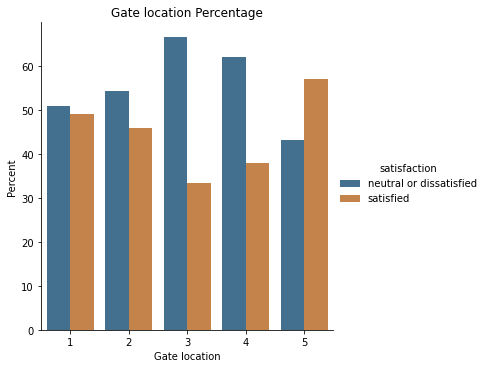

In [23]:
Gatlocpct = pctDf('Gate location', 'satisfaction', satData)
Gatlocpct = doaBGraph(Gatlocpct, 'Gate location')
plt.show(Gatlocpct)

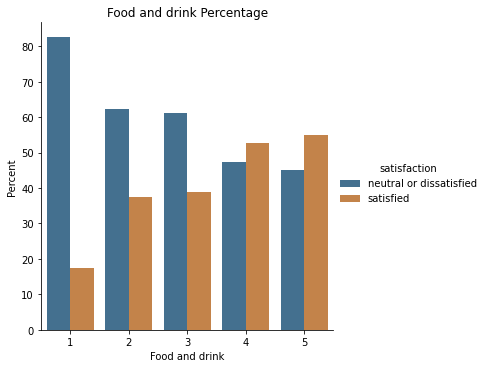

In [24]:
Foodpct = pctDf('Food and drink', 'satisfaction', satData)
Foodpct = doaBGraph(Foodpct, 'Food and drink')
plt.show(Foodpct)

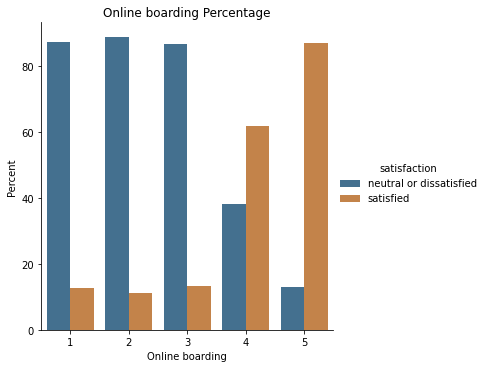

In [25]:
onlineboardpct = pctDf('Online boarding', 'satisfaction', satData)
onlineboardpct = doaBGraph(onlineboardpct, 'Online boarding')
plt.show(onlineboardpct)

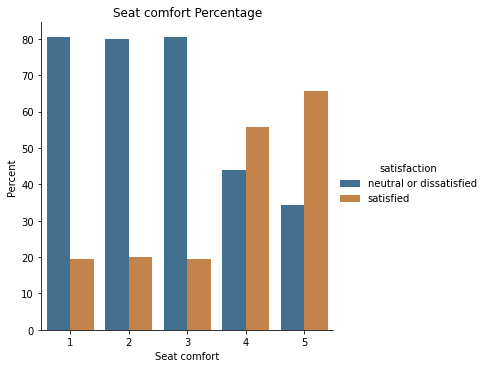

In [26]:
seatpct = pctDf('Seat comfort', 'satisfaction', satData)
seatpct = doaBGraph(seatpct, 'Seat comfort')
plt.show(seatpct)

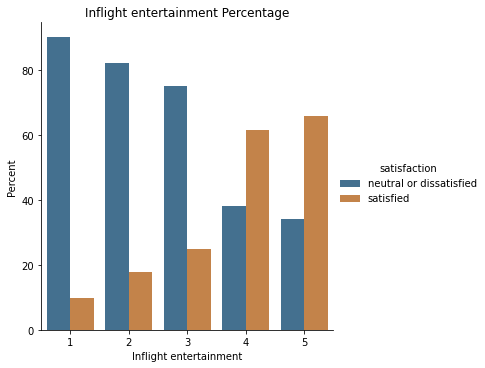

In [27]:
InEnterpct = pctDf('Inflight entertainment', 'satisfaction', satData)
InEnterpct = doaBGraph(InEnterpct, 'Inflight entertainment')
plt.show(InEnterpct)

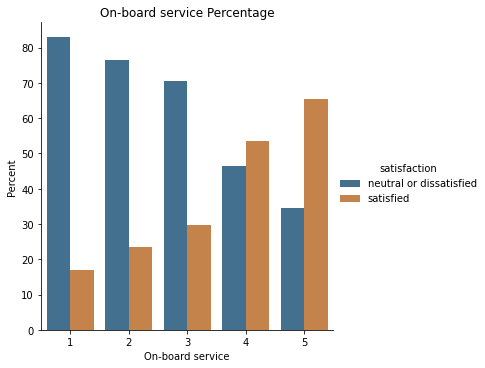

In [28]:
On_Boardpct = pctDf('On-board service', 'satisfaction', satData)
On_Boardpct = doaBGraph(On_Boardpct, 'On-board service')
plt.show(On_Boardpct)

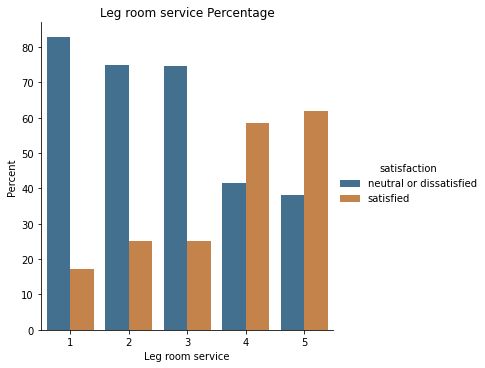

In [29]:
Legpct = pctDf('Leg room service', 'satisfaction', satData)
Legpct = doaBGraph(Legpct, 'Leg room service')
plt.show(Legpct)

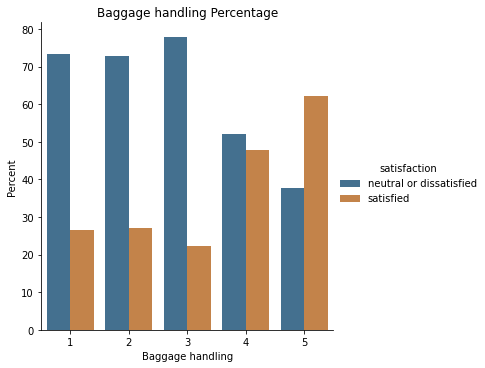

In [30]:
BagHandpct = pctDf('Baggage handling', 'satisfaction', satData)
BagHandpct = doaBGraph(BagHandpct, 'Baggage handling')
plt.show(BagHandpct)

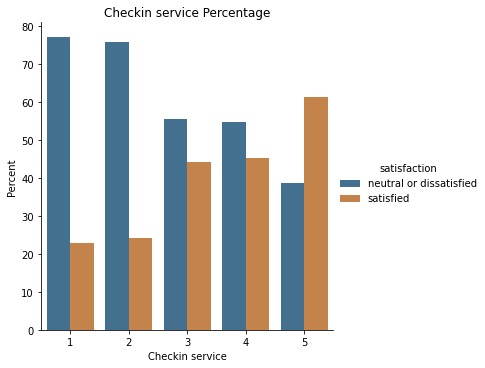

In [31]:
checkServepct = pctDf('Checkin service', 'satisfaction', satData)
checkServepct = doaBGraph(checkServepct, 'Checkin service')
plt.show(checkServepct)

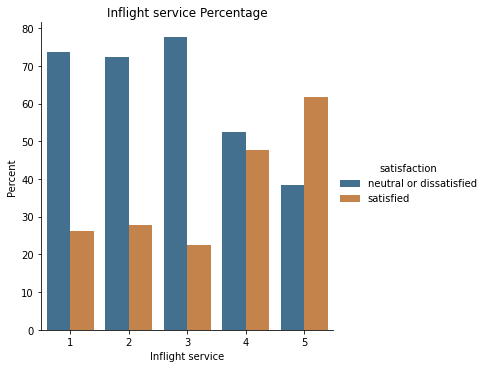

In [32]:
Inflightpct = pctDf('Inflight service', 'satisfaction', satData)
Inflightpct = doaBGraph(Inflightpct, 'Inflight service')
plt.show(Inflightpct)

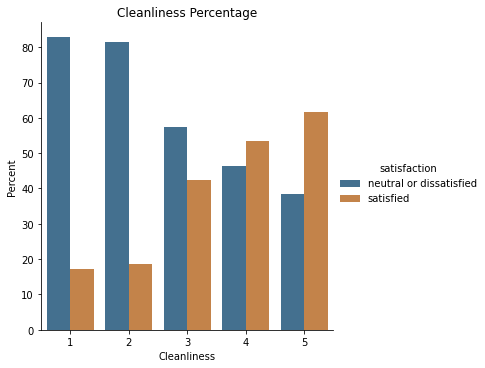

In [33]:
Cleanpct = pctDf('Cleanliness', 'satisfaction', satData)
Cleanpct = doaBGraph(Cleanpct, 'Cleanliness')
plt.show(Cleanpct)

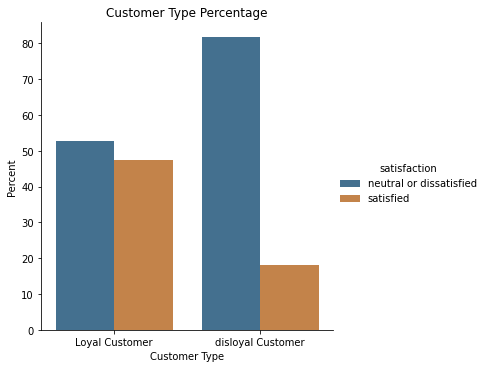

In [34]:
CutstTypepct = pctDf('Customer Type', 'satisfaction', satData)
CutstTypepct = doaBGraph(CutstTypepct, 'Customer Type')
plt.show(CutstTypepct)

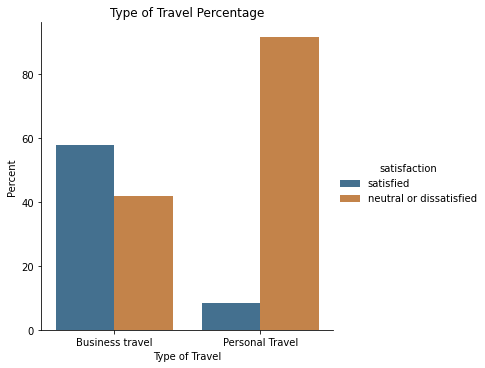

In [35]:
	
TypeTravpct = pctDf('Type of Travel', 'satisfaction', satData)
TypeTravpct = doaBGraph(TypeTravpct, 'Type of Travel')
plt.show(TypeTravpct)

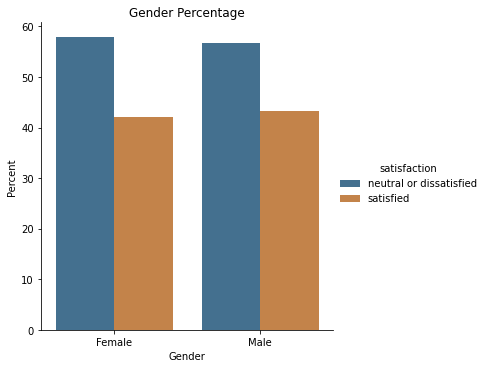

In [36]:
genderpct = pctDf('Gender', 'satisfaction', satData)
genderpct = doaBGraph(genderpct, 'Gender')
plt.show(genderpct)

### Start of Machine Learning Stuff 

In [37]:
m_df = satData

In [38]:
m_df.to_csv((os.getcwd() + r'\filtAirdata.csv'), index = False)

In [39]:
m_df.shape

(119204, 25)

# Didn't use anything below this 

In [40]:
m_df['Gender']=m_df['Gender'].astype('category').cat.codes
m_df['Customer Type']=m_df['Customer Type'].astype('category').cat.codes
m_df['Class']=m_df['Class'].astype('category').cat.codes
m_df['Type of Travel']=m_df['Type of Travel'].astype('category').cat.codes

m_df.shape

(119204, 25)

In [41]:
def dropUnCorr(df, compareCol, threshold):
    new_df = df.drop(compareCol, 1)
    correlation = new_df.corrwith(df[compareCol])
    correlation = correlation.abs().mul(100)
    tempList = list(new_df.columns)
    for i in range(len(correlation)):
        if correlation[i] < threshold:
            del df[tempList[i]]
             
    return [df,correlation]

In [42]:
Correlation = m_df.drop('satisfaction', 1).corrwith(m_df.satisfaction)
Correlation = Correlation.abs().mul(100)
dope = list(m_df.columns)
cool = m_df
print(cool.shape)
x = dropUnCorr(cool,'satisfaction', 10)

(119204, 25)


C:\Users\noaht\AppData\Local\Temp/ipykernel_14036/2640527426.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Correlation = m_df.drop('satisfaction', 1).corrwith(m_df.satisfaction)
C:\Users\noaht\AppData\Local\Temp/ipykernel_14036/2442886811.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = df.drop(compareCol, 1)


In [43]:
datCor = x[1]
cor_df = x[0]



In [44]:
data = {'Data': list(cor_df.columns), 'Correlation': list(datCor)}
print(len(data['Data']))
print(len(data['Correlation']))

18
24
